In [1]:
from evaluate_microstates import *
import matplotlib
import pandas as pd
import seaborn as sns

In [2]:
# test for the fourth microstates now 

n_maps = 5 # should only need to change this value 

min_range = 5
min_length = 5
matplot_colors = [
                "b", #: blue
                "g", #: green
                "r", #: red
                "c", #: cyan
                "m", #: magenta
                "y", #: yellow
                "k", #: black
                "w"  #: white
              ]
plotly_colors = [
              "blue",
              "green",
              "red",
              "cyan",
              "magenta",
              "yellow",
              "black",
              "white"
              ]

microstates_path = "D:\\pd_data\\microstates_{0}.npy".format(n_maps)
peaks_path = "D:\\pd_data\\peaks_{0}.npy".format(n_maps)

from preprocessing import sizes_control
from preprocessing import sizes_disease

# we have to divide everything by ten 
sizes_control = [x/10 for x in sizes_control]
sizes_disease = [x/10 for x in sizes_disease]

# I am only dealing with peaks 
microstates, peaks = load_files(microstates_path, peaks_path)
samples, borderline, samples_peaks, borderline2 = split_samples(microstates, peaks, sizes_control, sizes_disease, 
                                                                disease_first=False)
repeating_blocks = find_repeating_blocks(samples_peaks, n_maps)
repeat_blocks_start_end = find_repeating_blocks_start_end(repeating_blocks, n_maps)
class_to_ranges, max_range = find_classes_to_ranges(repeat_blocks_start_end, n_maps)
np.save("D:\\pd_data\\sample_peaks_{0}".format(n_maps), samples_peaks)
# just hard set borderline2 as borderline
print(len(samples_peaks))

# peaks with control 
microstates_controls = []
microstates_disease = []
for i in range(len(sizes_control)):
    microstates_controls.extend(samples_peaks[i])
    
for i in range(len(sizes_control),len(sizes_control)+len(sizes_disease)):
    microstates_disease.extend(samples_peaks[i])
    
np.save("D:\\pd_data\\microstates_controls_{0}".format(n_maps), microstates_controls)
np.save("D:\\pd_data\\microstates_disease_{0}".format(n_maps), microstates_disease)
print(len(microstates_controls))
print(len(microstates_disease))
print(borderline)

sample_markers = [0]
sample_lengths = []
for sample in samples_peaks:
    sample_lengths.append(len(sample))
    sample_markers.append(len(sample)+sample_markers[-1])
print sum(sample_lengths) / len(sample_lengths) 
print min(sample_lengths)
print max(sample_lengths)
print(sample_markers[1:])

The number of microstates: 1209420
The number of peaks: 284588
The borderline is at: 426960
The total is at: 1209420
Length of microstates sequence: 1209420
1209420
284588
1209416
68
103392
[(15, 44097), (10, 200818), (10, 54292), (10, 42997), (9, 106356), (8, 262422), (8, 255374), (8, 234621), (8, 208416), (8, 175161)]
The maximum sequence: 45
68
103392
181196
426960
4185
3252
5094
[3891, 8374, 12434, 16603, 20941, 24869, 28887, 33300, 37216, 41113, 45294, 49543, 53974, 58145, 62927, 67555, 72181, 76553, 81180, 85744, 90322, 95416, 99701, 103392, 107968, 112659, 117201, 121738, 125335, 128977, 132619, 136748, 140805, 144528, 148817, 152932, 156715, 161106, 165864, 169935, 173587, 177385, 181705, 185175, 190187, 194717, 198773, 202810, 206518, 210334, 214299, 219255, 223633, 227862, 231713, 235755, 240316, 244574, 248588, 252736, 255988, 259663, 263965, 268476, 272521, 276725, 281116, 284588]


In [13]:

borderline = len(microstates_controls)
microstates = microstates_controls + microstates_disease

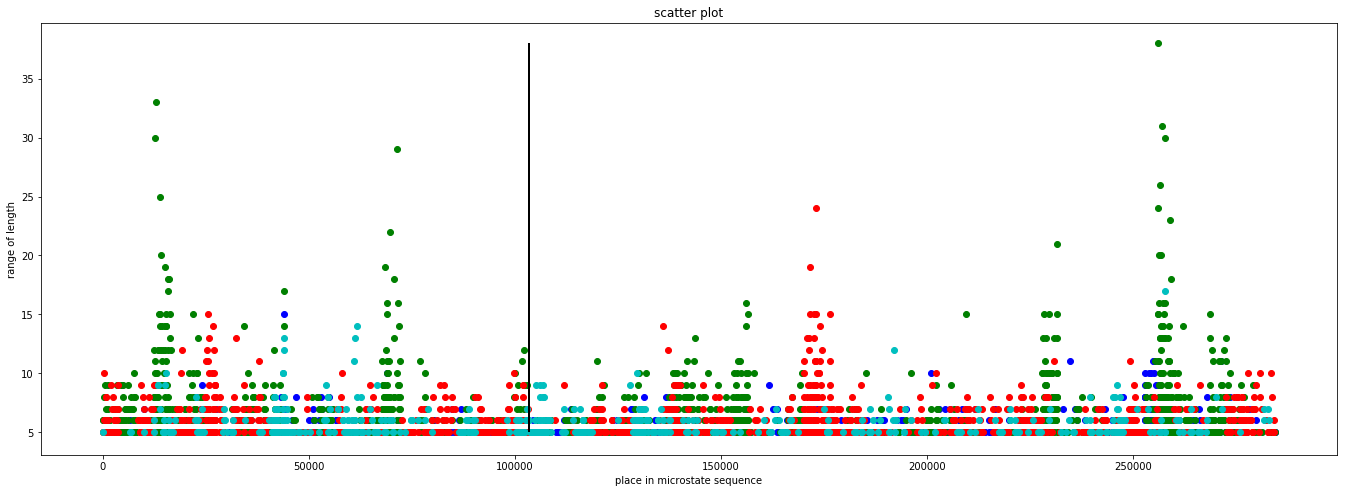

In [14]:
def plot_scatter_lengths(class_to_ranges, borderline, min_range, max_range):
    fig= plt.figure(figsize=(18,6))
    ax=fig.add_axes([0,0,1,1])
    # we will go throught the entire thing manually 
    for i in range(n_maps):
        ax.scatter(class_to_ranges[i]["x"], class_to_ranges[i]["y"], color=matplot_colors[i])

    ax.set_xlabel('place in microstate sequence')
    ax.set_ylabel('range of length')
    ax.set_title('scatter plot')

    # adding a borderline to show split between control and disease group
    plt.vlines(borderline, min_range, max_range, 'k', lw=2)

    plt.show()
plot_scatter_lengths(class_to_ranges, borderline2, min_range, max_range)

In [16]:
# try to do it in plotly
# plot just an interactive scatter so just plot the start points
def plot_scatter_lengths_plotly(class_to_ranges, borderline, min_range,max_range): 
    fig = go.Figure() 
    for n_class in range(n_maps):
        fig.add_trace(go.Scatter(
            x=class_to_ranges[n_class]["x"], y=class_to_ranges[n_class]["y"],
            name='class_{0}'.format(n_class),
            mode='markers',
            marker_color=plotly_colors[n_class]
        ))

    # add a borderline 
    fig.add_trace(go.Scatter(x=[borderline, borderline], y=[min_range,max_range], mode="lines", name="border", marker_color="black"))
    fig.update_layout(width=1200, height=500)
    fig.show()
plot_scatter_lengths_plotly(class_to_ranges, borderline2, min_range, max_range)

In [32]:
# plot just an interactive scatter so just plot the start points
def plot_longtiduinal_repeats(repeat_blocks_start_end, borderline, n_maps):
    fig = go.Figure() 
    for n_class in range(n_maps):
        n = len(repeat_blocks_start_end[n_class]['start'])
        y=np.empty(n)
        y.fill(n_class)
        fig.add_trace(go.Scatter(
            x=repeat_blocks_start_end[n_class]['start'], y=y,
            name='class_{0}'.format(n_class),
            mode='markers',
            marker_color=plotly_colors[n_class]
        ))

    # add a borderline 
    fig.add_trace(go.Scatter(x=[borderline, borderline], y=[-1,n_maps], mode="lines", name="border", marker_color="black"))
    fig.update_layout(width=1200, height=500)
    fig.show()

plot_longtiduinal_repeats(repeat_blocks_start_end, borderline2, n_maps)

In [34]:
def plot_longtitudinal_interactive(repeat_blocks_start_end, min_range, borderline):
    # so we are going to add the start data points only 
    # we make the data now 
    start = time.time()
    data = []
    max_length = 0 # just need to check this 
    fig = go.Figure()
    ranges = []

    for n_class in range(n_maps):
        num_points = len(repeat_blocks_start_end[n_class]['start'])
        for i in range(num_points): 
            left_side = repeat_blocks_start_end[n_class]['start'][i]
            right_side = repeat_blocks_start_end[n_class]['stop'][i]
            if right_side - left_side > max_length:
                max_length = right_side - left_side
            ranges.append(right_side - left_side)
            fig.add_trace(
                go.Scatter(
                    visible=True,
                    line=dict(color=plotly_colors[n_class], width=6),
                    name='{0}_{1}'.format(i,right_side - left_side),
                    x = np.array([left_side, right_side]),
                    y = np.array([n_class, n_class])
                )
            )
            sys.stdout.write('\r')
            # the exact output you're looking for:
            j = (i + 1)*1.0 / num_points
            sys.stdout.write("[%-20s] %d%%" % ('='*int(20*j), 100*j))
            sys.stdout.flush()
        print("\n")
    print "This is the maximum length: {0}".format(max_length)
    print "Total time: {0}".format(time.time() - start)
    # add a borderline 
    fig.add_trace(go.Scatter(
                    mode="lines",
                    visible=True,
                    line=dict(color="black", width=2),
                    name="border",
                    x = np.array([borderline, borderline]),
                    y = np.array([-1,n_maps])))
    ranges.append(max_length)
    # subtracting one since the border is one of the objects in fig data 
    # Create and add slider
    steps = []
    for i in range(min_length,max_length):
        step = dict(
            label=str(i),
            method="restyle",
            args=["visible", [False] * len(fig.data)],
        )
        for j in range(len(fig.data)):
            if ranges[j] >= i:
                step["args"][1][j] = True  # Toggle i'th trace to "visible"
        steps.append(step)

    sliders = [dict(
        active=0,
        currentvalue={"prefix": "Length: "},
        pad={"t": max_length-min_length},
        steps=steps
    )]

    fig.update_layout(
        width=1200,
        sliders=sliders,
        showlegend=False
    )

    fig.show()

plot_longtitudinal_interactive(repeat_blocks_start_end, min_range, borderline2)

[====================] 100%

[====================] 100%

[====================] 100%

[====================] 100%

[====================] 100%

[====================] 100%

[====================] 100%

This is the maximum length: 20
Total time: 12.1579999924


In [7]:
# we want to do a scatter plot with the controls 
def box_plot(df, x_name, y_name):
    # Draw Plot
    plt.figure(figsize=(13,10), dpi= 80)
    sns.boxplot(x=x_name, y=y_name, data=df, hue=x_name)
    sns.stripplot(x=x_name, y=y_name, data=df, color='black', size=3, jitter=1)

    for i in range(len(df[x_name].unique())-1):
        plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

    # Decoration
    plt.title('Box Plot of Length of Contigous Microstates Given Microstates', fontsize=22)
    plt.legend(title='States')
    plt.show()
    
def violin_plot(df, x_name, y_name):
    # Draw Plot
    plt.figure(figsize=(13,10), dpi= 80)
    sns.violinplot(x=x_name, y=y_name, data=df, scale='width', inner='quartile')

    # Decoration
    plt.title('Violin Plot of Samples Given States', fontsize=22)
    plt.show()

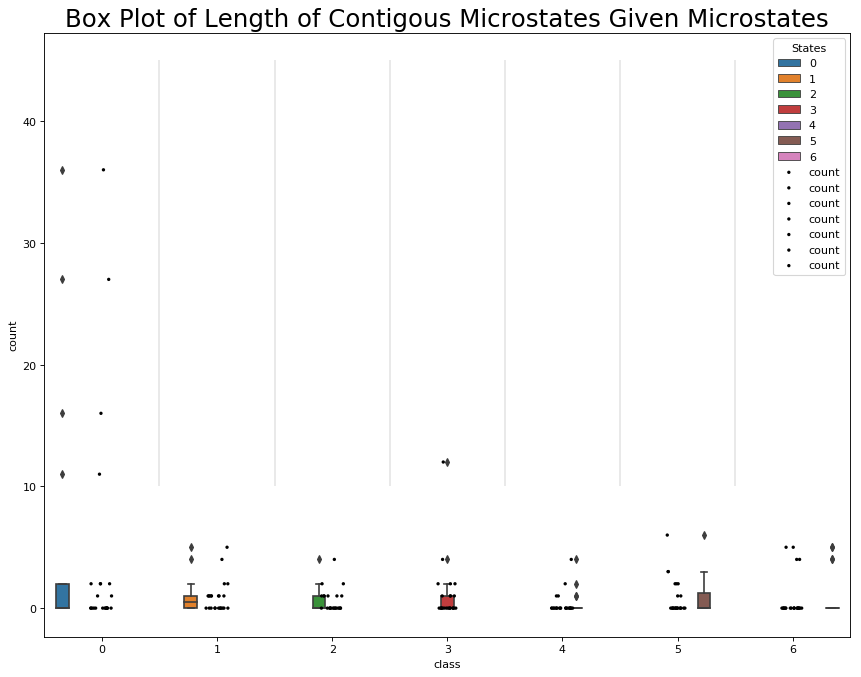

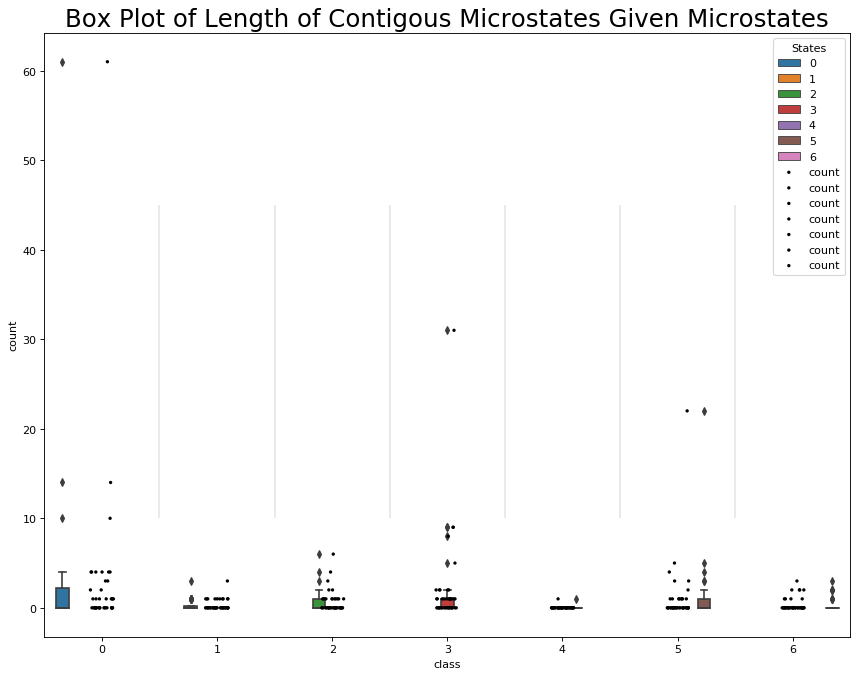

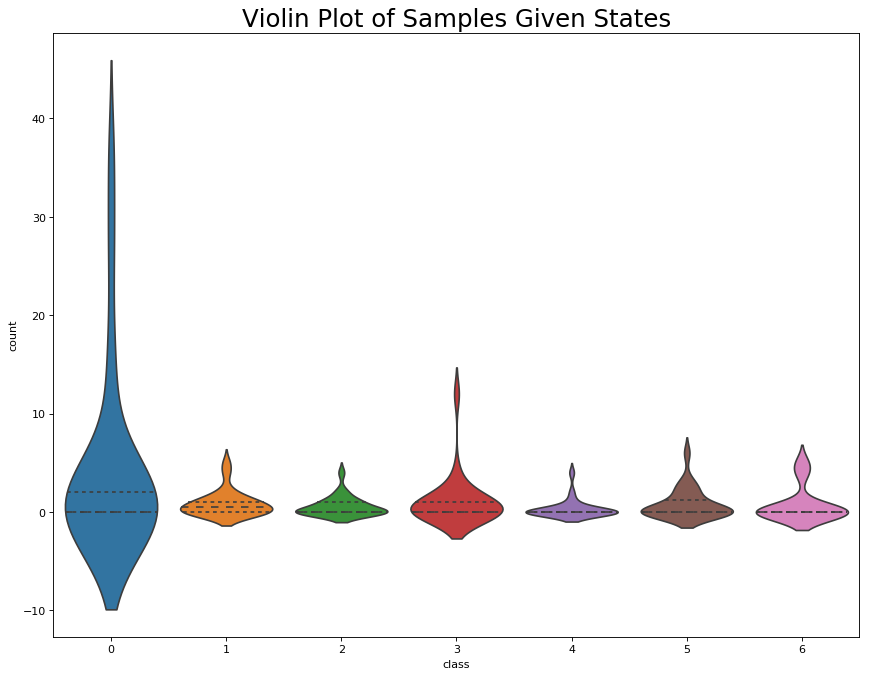

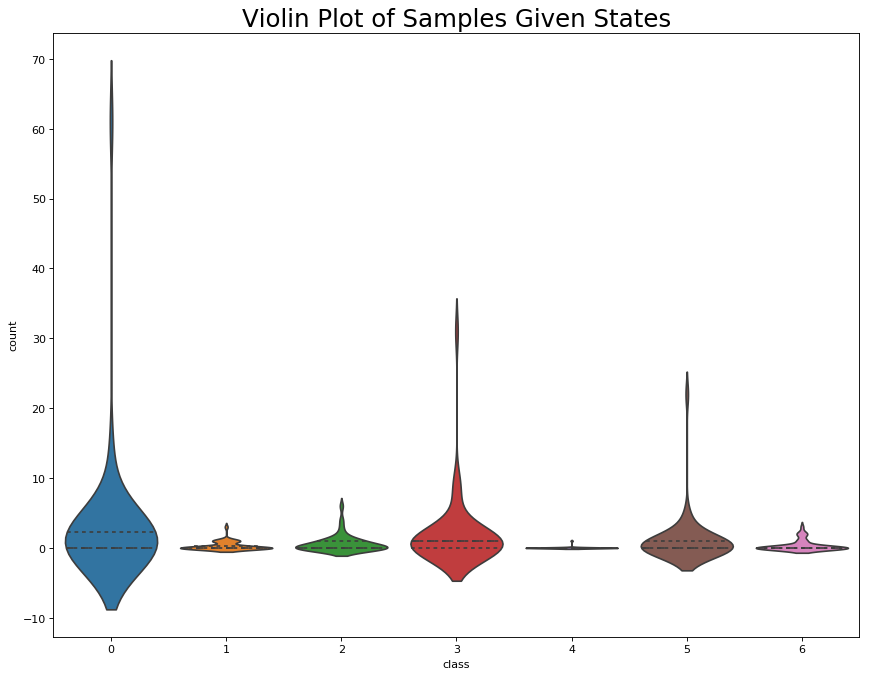

class: 0
Welch's t-test= 0.5397
p-value = 0.5919
Welch-Satterthwaite Degrees of Freedom= 47.9857
REJECTED


class: 1
Welch's t-test= 2.0753
p-value = 0.0471
Welch-Satterthwaite Degrees of Freedom= 28.4772
ACCEPTED


class: 2
Welch's t-test= -0.1971
p-value = 0.8445
Welch-Satterthwaite Degrees of Freedom= 56.7119
REJECTED


class: 3
Welch's t-test= -0.9263
p-value = 0.3577
Welch-Satterthwaite Degrees of Freedom= 65.6746
REJECTED


class: 4
Welch's t-test= 1.6476
p-value = 0.1126
Welch-Satterthwaite Degrees of Freedom= 23.6941
REJECTED


class: 5
Welch's t-test= -0.3915
p-value = 0.6967
Welch-Satterthwaite Degrees of Freedom= 63.5401
REJECTED


class: 6
Welch's t-test= 1.1064
p-value = 0.2781
Welch-Satterthwaite Degrees of Freedom= 27.8595
REJECTED




In [35]:
# need to split samples 
samples_to_lengths = [get_counts(x, min_range, n_maps) for x in samples_peaks]
control_lengths = samples_to_lengths[:len(sizes_control)]
disease_lengths = samples_to_lengths[len(sizes_control):]

control_counts = number_per_sample(control_lengths)
disease_counts = number_per_sample(disease_lengths)

# make a pd dataframe 
box_plot(dict_to_df(control_counts), "class", "count")
box_plot(dict_to_df(disease_counts), "class", "count")

violin_plot(dict_to_df(control_counts), "class", "count")
violin_plot(dict_to_df(disease_counts), "class", "count")

for index in range(n_maps):
    print "class:", str(index) 
    a = np.array([x[index] for x in control_counts])
    b = np.array([x[index] for x in disease_counts])

    p = welch_ttest(a,b)
    if p > 0.05:
        print "REJECTED"
    else:
        print "ACCEPTED"
    print "\n"

In [9]:
# save it to field 